# Polynomial regression and its restrictions
<b>Developed by</b> Elias Anderssen Dalan <a href="mailto:ceadyy@gmail.com">✉️</a>, supported by Centre for Computing in Science Education and Hylleraas Centre for Quantum Molecular Sciences.

### Things you might need before tackling this notebook:
<ul>
    <li><a href="https://en.wikipedia.org/wiki/Polynomial_regression">Polynomial regression</a>
</ul>

Most students are familiar with, or atleast have been introduced to, the concept of polynomial regression. Polynomial regression is a form of data analysis where the relationship between an independent variable x and the dependant variable y is modeled using some sort of n-th order polynomial. You are most likely fammiliar with linear regression. One example is shown below:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

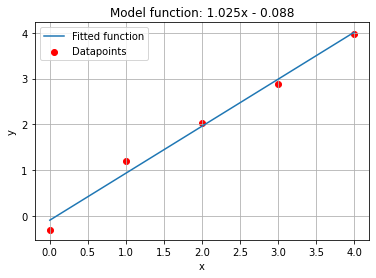

In [2]:
x = [0, 1, 2, 3, 4] 
y = [-.3, 1.2, 2.04, 2.89, 3.98] #Datapoints measured

a, b = np.polyfit(x, y, 1)
x_ = np.linspace(0, 4, 100)
y_ = a * x_ + b

plt.title(f"Model function: {round(a,3)}x - {abs(round(b,3))}")
plt.scatter(x, y, label="Datapoints", color="red")
plt.plot(x_, y_, label="Fitted function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

When trying to model more complex functions, such as a titration curve or a phase diagram, regression using polynomials usually fails because of their underlying restrictions. Every model carries something called an inductive bias, which are restrictions which follow from the assumptions made when choosing a model. I. ex: If you choose a linear regression model, you assume that the relationship between x and y is linear, which restricts you to only model linear relationships.

As an example we have tried to model $f(x)=e^{-(x-1)^2}+e^{-(x+1)^2}$ using polynomials of different orders:

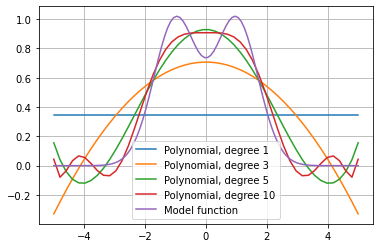

In [3]:
fx = lambda x: np.exp(-(x-1)**2) + np.exp(-(x+1)**2)

x = np.linspace(-5, 5, 50)
y = fx(x)

a, b = np.polyfit(x, y, 1) #linear regression
f1 = a * x + b

a, b, c, d = np.polyfit(x, y, 3) #cubic
f3 = a*x**3 + b*x**2 + c*x + d

a, b, c, d, e, f = np.polyfit(x, y, 5)
f5 = a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f

n = 10
f_n = 0

coeff = np.polyfit(x, y, n)
for i, coe in enumerate(coeff):
    f_n += coe * x**(n-i)

plt.plot(x, f1, label="Polynomial, degree 1")
plt.plot(x, f3, label="Polynomial, degree 3")
plt.plot(x, f5, label="Polynomial, degree 5")
plt.plot(x, f_n, label=f"Polynomial, degree {n}")

x = np.linspace(-5, 5, 100)
plt.plot(x, fx(x), label="Model function")
plt.grid()
plt.legend()
plt.show()

As you can probably imagine, polynomial regression is not great when trying to model a non-polynomial function. Alot of functions that we encounter in the real world are not easily constructed as a combination of "normal" functions (sine, cosine, polynomials, exponentials and such), so often one needs to use different methods.